<a href="https://colab.research.google.com/github/debolina201/Basic-Sentiment-Analysis-with-ML/blob/master/Pie%26AI%20Sentiment%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1: Loading and exploring the dataset

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Pie and AI Session/Sentiment Analysis/IMDB Dataset.csv')
print(data.shape)

(50000, 2)


In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data.review[1] # a positive review

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [ ]:
data.review[3] # a negative review

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

In [ ]:
# Encoding the labels

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(data.sentiment)

y = le.transform(data.sentiment)
print(le.classes_)
print(y)

['negative' 'positive']
[1 1 1 ... 0 0 0]


## Generating Word Clouds

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

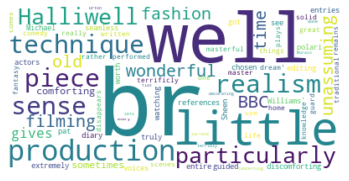

In [ ]:
pos_cloud = WordCloud(background_color="white").generate(data.review[1])

# Create a figure of the generated cloud
plt.imshow(pos_cloud, interpolation='bilinear')  
plt.axis('off')

# Display the figure
plt.show()

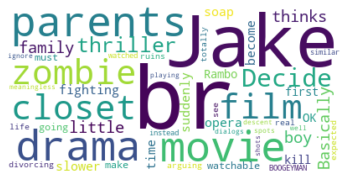

In [ ]:
neg_cloud = WordCloud(background_color="white").generate(data.review[3])

# Create a figure of the generated cloud
plt.imshow(neg_cloud, interpolation='bilinear')  
plt.axis('off')

# Display the figure
plt.show()

# TEXT PREPROCESSING

* Lowercasing
* Punctuation removal
* Tokenization
* Stop-word removal
* Stemming

In [ ]:
import nltk
import re
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

stop = stopwords.words('english')
punc = string.punctuation

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
data['review'] = data['review'].str.lower() #lowercasing
data['review'] = data['review'].str.replace('[^a-z\s]', '') #removing non-alphabetical chars

In [ ]:
data.review[3]

'basically theres a family where a little boy jake thinks theres a zombie in his closet  his parents are fighting all the timebr br this movie is slower than a soap opera and suddenly jake decides to become rambo and kill the zombiebr br ok first of all when youre going to make a film you must decide if its a thriller or a drama as a drama the movie is watchable parents are divorcing  arguing like in real life and then we have jake with his closet which totally ruins all the film i expected to see a boogeyman similar movie and instead i watched a drama with some meaningless thriller spotsbr br  out of  just for the well playing parents  descent dialogs as for the shots with jake just ignore them'

In [ ]:
data['review'] = data['review'].apply(word_tokenize)
print(data.review[3])

['basically', 'theres', 'a', 'family', 'where', 'a', 'little', 'boy', 'jake', 'thinks', 'theres', 'a', 'zombie', 'in', 'his', 'closet', 'his', 'parents', 'are', 'fighting', 'all', 'the', 'timebr', 'br', 'this', 'movie', 'is', 'slower', 'than', 'a', 'soap', 'opera', 'and', 'suddenly', 'jake', 'decides', 'to', 'become', 'rambo', 'and', 'kill', 'the', 'zombiebr', 'br', 'ok', 'first', 'of', 'all', 'when', 'youre', 'going', 'to', 'make', 'a', 'film', 'you', 'must', 'decide', 'if', 'its', 'a', 'thriller', 'or', 'a', 'drama', 'as', 'a', 'drama', 'the', 'movie', 'is', 'watchable', 'parents', 'are', 'divorcing', 'arguing', 'like', 'in', 'real', 'life', 'and', 'then', 'we', 'have', 'jake', 'with', 'his', 'closet', 'which', 'totally', 'ruins', 'all', 'the', 'film', 'i', 'expected', 'to', 'see', 'a', 'boogeyman', 'similar', 'movie', 'and', 'instead', 'i', 'watched', 'a', 'drama', 'with', 'some', 'meaningless', 'thriller', 'spotsbr', 'br', 'out', 'of', 'just', 'for', 'the', 'well', 'playing', 'pare

In [ ]:
stemmer = PorterStemmer()

def clean(df):
  cleaned_tokens = []
  for word in df:
    if(word not in stop and word not in punc):
      cleaned_tokens.append(stemmer.stem(word))
  return cleaned_tokens

data['review'] = data['review'].apply(clean)

In [ ]:
d = data.review
merged =[]
for doc in d:
  merged.append((' '.join(doc)))

data.review = merged
data.head(10)

,review,sentiment
0,one review mention watch oz episod youll hook ...,positive
1,wonder littl product br br film techniqu unass...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic there famili littl boy jake think there ...,negative
4,petter mattei love time money visual stun film...,positive
5,probabl alltim favorit movi stori selfless sac...,positive
6,sure would like see resurrect date seahunt ser...,positive
7,show amaz fresh innov idea first air first yea...,negative
8,encourag posit comment film look forward watch...,negative
9,like origin gut wrench laughter like movi youn...,positive


In [ ]:
import pickle as pkl

pkl.dump(data, open('/content/drive/MyDrive/Pie and AI Session/Sentiment Analysis/preprocessed_data.pkl', 'wb'))

# Bag of Words

In [ ]:
# Loading the preprocessed data

import pickle as pkl
data = pkl.load(open('/content/drive/MyDrive/Pie and AI Session/Sentiment Analysis/preprocessed_data.pkl', 'rb'))

In [ ]:
data.head(3)

,review,sentiment
0,one review mention watch oz episod youll hook ...,positive
1,wonder littl product br br film techniqu unass...,positive
2,thought wonder way spend time hot summer weeke...,positive


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.review, y, test_size=0.30, random_state=12)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35000,), (15000,), (35000,), (15000,))

In [ ]:
vectorizer = CountVectorizer(max_features=10000)

# Generate matrix of word vectors
vectorizer.fit(X_train)

# Create BOW feature vectors for training and testing
X_train_bow = vectorizer.transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [ ]:
X_train_bow[0]

<1x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 67 stored elements in Compressed Sparse Row format>

In [ ]:
X_train_bow = X_train_bow.toarray()
X_test_bow = X_test_bow.toarray()

In [ ]:
X_train_bow.shape, X_test_bow.shape

((35000, 10000), (15000, 10000))

In [ ]:
X_train_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Model Training

In [ ]:
clf = MultinomialNB()
clf.fit(X_train_bow, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
preds = clf.predict(X_test_bow)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds)

array([[6434, 1100],
       [1261, 6205]])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, preds))
print(classification_report(y_test, preds))

0.8426
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      7534
           1       0.85      0.83      0.84      7466

    accuracy                           0.84     15000
   macro avg       0.84      0.84      0.84     15000
weighted avg       0.84      0.84      0.84     15000



# Using TF-IDF feature vectors

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000)

vectorizer.fit(X_train)

X_train_tfidf = vectorizer.transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
X_train_tfidf = X_train_tfidf.toarray()
X_test_tfidf = X_test_tfidf.toarray()

In [ ]:
clf1 = MultinomialNB()
clf1.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
preds1 = clf.predict(X_test_tfidf)

confusion_matrix(y_test, preds1)

array([[6135, 1399],
       [1036, 6430]])

In [ ]:
print(accuracy_score(y_test, preds1))
print(classification_report(y_test, preds1))

0.8376666666666667
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      7534
           1       0.82      0.86      0.84      7466

    accuracy                           0.84     15000
   macro avg       0.84      0.84      0.84     15000
weighted avg       0.84      0.84      0.84     15000

